In [7]:
import pickle
import pennylane as qml
import torch
from data_utils import mnist_preparation 
from tqdm import tqdm
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from mcmadaptablemodel import MCMQuantumModel, MCMCircuit
import matplotlib.pyplot as plt

In [8]:
labels = [0,1,2,3]
# Download MNIST and prepare transforms
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([
                                transforms.Resize((16, 16)),  # Resize to 16x16
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))  # Normalize
                             ]))
#train/vali/test 70/15/15 split, see data_utils.py for further details
train_dataloader, validation_dataloader, test_dataloader = mnist_preparation(dataset=mnist, labels = labels, train_test_ratio=0.7,batch_size=64, vali_test_ratio=0.5)

print("Images in the training set: ", len(train_dataloader.dataset), "\n Images in the validation set: ", len(validation_dataloader.dataset), "\n Images in the test set: ", len(test_dataloader.dataset))

Images in the training set:  17327 
 Images in the validation set:  3713 
 Images in the test set:  3714


In [9]:
model = MCMQuantumModel(qubits = 8, layers = 8, early_exits=[3])

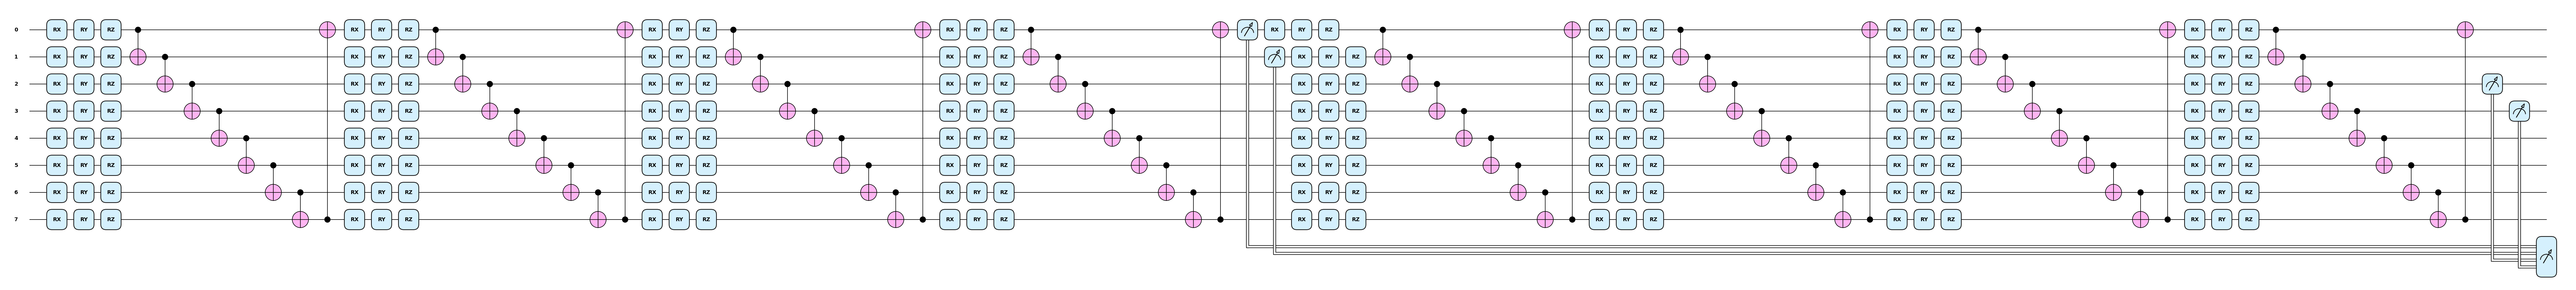

In [11]:
model.draw(style = 'pennylane')

In [12]:
mcm_accuracy, fm_accuracy, loss_history = model.fit(dataloader=train_dataloader, sched_epochs=5, learning_rate=[0.01, 1e-3], epochs=50)

Epoch 1/50: 100%|██████████| 270/270 [02:12<00:00,  2.03it/s, fm_accuracy=0.891, loss=2.19, mcm_accuracy=0.859]


Time per epoch (s):  133.00918793678284
Epoch:  1 Loss:  2.3282843280721592
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8457175925925926
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8564814814814815
--------------------------------------------------------------------------


Epoch 2/50: 100%|██████████| 270/270 [02:13<00:00,  2.02it/s, fm_accuracy=0.922, loss=2.05, mcm_accuracy=0.859]


Time per epoch (s):  133.52191591262817
Epoch:  2 Loss:  2.0750005819179393
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8674768518518519
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9019097222222222
--------------------------------------------------------------------------


Epoch 3/50: 100%|██████████| 270/270 [02:12<00:00,  2.03it/s, fm_accuracy=0.938, loss=1.81, mcm_accuracy=0.891]


Time per epoch (s):  132.99566793441772
Epoch:  3 Loss:  2.0007980660155966
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8805555555555555
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9086805555555556
--------------------------------------------------------------------------


Epoch 4/50: 100%|██████████| 270/270 [02:13<00:00,  2.03it/s, fm_accuracy=0.969, loss=1.99, mcm_accuracy=0.781]


Time per epoch (s):  133.17098212242126
Epoch:  4 Loss:  1.885707062262076
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8733217592592593
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9025462962962963
--------------------------------------------------------------------------


Epoch 5/50: 100%|██████████| 270/270 [02:12<00:00,  2.04it/s, fm_accuracy=0.922, loss=1.78, mcm_accuracy=0.875]


Time per epoch (s):  132.67146015167236
Epoch:  5 Loss:  1.8466552429729037
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8803240740740741
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9102430555555555
--------------------------------------------------------------------------


Epoch 6/50: 100%|██████████| 270/270 [02:08<00:00,  2.10it/s, fm_accuracy=0.891, loss=1.88, mcm_accuracy=0.828]


Time per epoch (s):  128.44851112365723
Epoch:  6 Loss:  1.8340886685583326
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8826388888888889
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9185763888888889
--------------------------------------------------------------------------


Epoch 7/50: 100%|██████████| 270/270 [02:10<00:00,  2.07it/s, fm_accuracy=0.906, loss=1.8, mcm_accuracy=0.922] 


Time per epoch (s):  130.30722093582153
Epoch:  7 Loss:  1.832943649645205
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8835648148148149
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9193865740740741
--------------------------------------------------------------------------


Epoch 8/50: 100%|██████████| 270/270 [02:09<00:00,  2.08it/s, fm_accuracy=0.969, loss=1.7, mcm_accuracy=0.938] 


Time per epoch (s):  129.5368149280548
Epoch:  8 Loss:  1.8311663389205932
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8848958333333333
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9217592592592593
--------------------------------------------------------------------------


Epoch 9/50: 100%|██████████| 270/270 [02:16<00:00,  1.98it/s, fm_accuracy=0.938, loss=1.77, mcm_accuracy=0.891]


Time per epoch (s):  136.58488488197327
Epoch:  9 Loss:  1.8306800303635773
--------------------------------------------------------------------------
Mid circuit accuracy:  0.885474537037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9227430555555556
--------------------------------------------------------------------------


Epoch 10/50: 100%|██████████| 270/270 [02:28<00:00,  1.82it/s, fm_accuracy=0.953, loss=1.87, mcm_accuracy=0.922]


Time per epoch (s):  148.12674283981323
Epoch:  10 Loss:  1.8297999602776986
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8842013888888889
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9212962962962963
--------------------------------------------------------------------------


Epoch 11/50: 100%|██████████| 270/270 [02:25<00:00,  1.86it/s, fm_accuracy=0.891, loss=1.9, mcm_accuracy=0.875] 


Time per epoch (s):  145.38727807998657
Epoch:  11 Loss:  1.82919777808366
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8859953703703703
--------------------------------------------------------------------------
Final Measurement accuracy:  0.922511574074074
--------------------------------------------------------------------------


Epoch 12/50: 100%|██████████| 270/270 [02:23<00:00,  1.88it/s, fm_accuracy=0.906, loss=1.86, mcm_accuracy=0.812]


Time per epoch (s):  143.3139889240265
Epoch:  12 Loss:  1.8284458072097214
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8861689814814815
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9215856481481481
--------------------------------------------------------------------------


Epoch 13/50: 100%|██████████| 270/270 [02:28<00:00,  1.82it/s, fm_accuracy=0.938, loss=1.77, mcm_accuracy=0.938]


Time per epoch (s):  148.5164930820465
Epoch:  13 Loss:  1.827876219484541
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8868634259259259
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9221064814814814
--------------------------------------------------------------------------


Epoch 14/50: 100%|██████████| 270/270 [02:22<00:00,  1.90it/s, fm_accuracy=0.938, loss=1.9, mcm_accuracy=0.812] 


Time per epoch (s):  142.3997950553894
Epoch:  14 Loss:  1.826422502817931
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8861689814814815
--------------------------------------------------------------------------
Final Measurement accuracy:  0.921238425925926
--------------------------------------------------------------------------


Epoch 15/50: 100%|██████████| 270/270 [02:21<00:00,  1.91it/s, fm_accuracy=0.922, loss=1.79, mcm_accuracy=0.875]


Time per epoch (s):  141.3576409816742
Epoch:  15 Loss:  1.8264687193764582
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8871527777777778
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9227430555555556
--------------------------------------------------------------------------


Epoch 16/50: 100%|██████████| 270/270 [02:27<00:00,  1.83it/s, fm_accuracy=0.938, loss=1.75, mcm_accuracy=0.906]


Time per epoch (s):  147.6240589618683
Epoch:  16 Loss:  1.825687004018713
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8865740740740741
--------------------------------------------------------------------------
Final Measurement accuracy:  0.921238425925926
--------------------------------------------------------------------------


Epoch 17/50: 100%|██████████| 270/270 [02:28<00:00,  1.82it/s, fm_accuracy=0.859, loss=1.94, mcm_accuracy=0.875]


Time per epoch (s):  148.4210422039032
Epoch:  17 Loss:  1.8255581312709384
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8865740740740741
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9212962962962963
--------------------------------------------------------------------------


Epoch 18/50: 100%|██████████| 270/270 [02:30<00:00,  1.79it/s, fm_accuracy=0.891, loss=1.84, mcm_accuracy=0.859]


Time per epoch (s):  150.68150806427002
Epoch:  18 Loss:  1.8249951234570256
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8869212962962963
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9213541666666667
--------------------------------------------------------------------------


Epoch 19/50: 100%|██████████| 270/270 [02:31<00:00,  1.79it/s, fm_accuracy=0.891, loss=1.88, mcm_accuracy=0.812]


Time per epoch (s):  151.04446816444397
Epoch:  19 Loss:  1.8244340026820147
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8865740740740741
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9207175925925926
--------------------------------------------------------------------------


Epoch 20/50: 100%|██████████| 270/270 [02:23<00:00,  1.88it/s, fm_accuracy=0.906, loss=1.84, mcm_accuracy=0.844]


Time per epoch (s):  143.6665689945221
Epoch:  20 Loss:  1.8240286191304524
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8865162037037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9190393518518518
--------------------------------------------------------------------------


Epoch 21/50: 100%|██████████| 270/270 [02:26<00:00,  1.84it/s, fm_accuracy=0.922, loss=1.74, mcm_accuracy=0.875]


Time per epoch (s):  146.47188520431519
Epoch:  21 Loss:  1.823933764298757
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8868634259259259
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9198495370370371
--------------------------------------------------------------------------


Epoch 22/50: 100%|██████████| 270/270 [02:30<00:00,  1.79it/s, fm_accuracy=0.906, loss=1.83, mcm_accuracy=0.844]


Time per epoch (s):  150.74774980545044
Epoch:  22 Loss:  1.8236377552703575
--------------------------------------------------------------------------
Mid circuit accuracy:  0.885011574074074
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9185763888888889
--------------------------------------------------------------------------


Epoch 23/50: 100%|██████████| 270/270 [02:26<00:00,  1.84it/s, fm_accuracy=0.922, loss=1.75, mcm_accuracy=0.922]


Time per epoch (s):  146.34297609329224
Epoch:  23 Loss:  1.8226634546562477
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8868634259259259
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9193287037037037
--------------------------------------------------------------------------


Epoch 24/50: 100%|██████████| 270/270 [02:23<00:00,  1.88it/s, fm_accuracy=0.891, loss=1.86, mcm_accuracy=0.859]


Time per epoch (s):  143.52166175842285
Epoch:  24 Loss:  1.8231296066884641
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8868055555555555
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9184027777777778
--------------------------------------------------------------------------


Epoch 25/50: 100%|██████████| 270/270 [02:24<00:00,  1.87it/s, fm_accuracy=0.938, loss=1.91, mcm_accuracy=0.844]


Time per epoch (s):  144.07790279388428
Epoch:  25 Loss:  1.8224409858385722
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8858217592592592
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9188657407407408
--------------------------------------------------------------------------


Epoch 26/50: 100%|██████████| 270/270 [02:29<00:00,  1.81it/s, fm_accuracy=0.859, loss=1.92, mcm_accuracy=0.766]


Time per epoch (s):  149.1045470237732
Epoch:  26 Loss:  1.8224078589015538
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8867476851851852
--------------------------------------------------------------------------
Final Measurement accuracy:  0.91875
--------------------------------------------------------------------------


Epoch 27/50: 100%|██████████| 270/270 [02:15<00:00,  2.00it/s, fm_accuracy=0.828, loss=1.91, mcm_accuracy=0.812]


Time per epoch (s):  135.2368049621582
Epoch:  27 Loss:  1.8221660525710495
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8866898148148148
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9178819444444445
--------------------------------------------------------------------------


Epoch 28/50: 100%|██████████| 270/270 [01:53<00:00,  2.39it/s, fm_accuracy=0.906, loss=1.88, mcm_accuracy=0.875]


Time per epoch (s):  113.10681414604187
Epoch:  28 Loss:  1.822080174198857
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8864004629629629
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9188657407407408
--------------------------------------------------------------------------


Epoch 29/50: 100%|██████████| 270/270 [01:52<00:00,  2.39it/s, fm_accuracy=0.906, loss=1.83, mcm_accuracy=0.875]


Time per epoch (s):  112.75366926193237
Epoch:  29 Loss:  1.822051880977772
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8868055555555555
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9188078703703704
--------------------------------------------------------------------------


Epoch 30/50: 100%|██████████| 270/270 [01:52<00:00,  2.40it/s, fm_accuracy=0.969, loss=1.71, mcm_accuracy=0.969]


Time per epoch (s):  112.43079781532288
Epoch:  30 Loss:  1.821807649400499
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8857638888888889
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9175925925925926
--------------------------------------------------------------------------


Epoch 31/50: 100%|██████████| 270/270 [01:53<00:00,  2.39it/s, fm_accuracy=0.906, loss=1.82, mcm_accuracy=0.875]


Time per epoch (s):  113.1407961845398
Epoch:  31 Loss:  1.8217663495628922
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8854166666666666
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9177662037037037
--------------------------------------------------------------------------


Epoch 32/50: 100%|██████████| 270/270 [01:53<00:00,  2.38it/s, fm_accuracy=0.938, loss=1.84, mcm_accuracy=0.891]


Time per epoch (s):  113.27699995040894
Epoch:  32 Loss:  1.8215978662172954
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8863425925925926
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9178819444444445
--------------------------------------------------------------------------


Epoch 33/50: 100%|██████████| 270/270 [01:52<00:00,  2.40it/s, fm_accuracy=0.891, loss=1.89, mcm_accuracy=0.875]


Time per epoch (s):  112.49904489517212
Epoch:  33 Loss:  1.8215689367718166
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8865162037037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9171875
--------------------------------------------------------------------------


Epoch 34/50: 100%|██████████| 270/270 [01:53<00:00,  2.39it/s, fm_accuracy=0.922, loss=1.85, mcm_accuracy=0.875]


Time per epoch (s):  113.17211818695068
Epoch:  34 Loss:  1.8209704641942626
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8867476851851852
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9175925925925926
--------------------------------------------------------------------------


Epoch 35/50: 100%|██████████| 270/270 [01:52<00:00,  2.40it/s, fm_accuracy=0.938, loss=1.83, mcm_accuracy=0.859]


Time per epoch (s):  112.35611200332642
Epoch:  35 Loss:  1.8206895545676902
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8877893518518518
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9171875
--------------------------------------------------------------------------


Epoch 36/50: 100%|██████████| 270/270 [01:52<00:00,  2.40it/s, fm_accuracy=0.859, loss=1.8, mcm_accuracy=0.891] 


Time per epoch (s):  112.72338223457336
Epoch:  36 Loss:  1.820280823442671
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8874421296296297
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9160300925925926
--------------------------------------------------------------------------


Epoch 37/50: 100%|██████████| 270/270 [01:53<00:00,  2.39it/s, fm_accuracy=0.906, loss=1.72, mcm_accuracy=0.922]


Time per epoch (s):  113.12424802780151
Epoch:  37 Loss:  1.8204588404408208
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8873842592592592
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9170717592592592
--------------------------------------------------------------------------


Epoch 38/50: 100%|██████████| 270/270 [01:54<00:00,  2.36it/s, fm_accuracy=0.906, loss=1.85, mcm_accuracy=0.891]


Time per epoch (s):  114.29630208015442
Epoch:  38 Loss:  1.8200008533619068
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8856481481481482
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9148148148148149
--------------------------------------------------------------------------


Epoch 39/50: 100%|██████████| 270/270 [01:54<00:00,  2.35it/s, fm_accuracy=0.906, loss=1.84, mcm_accuracy=0.859]


Time per epoch (s):  114.82730078697205
Epoch:  39 Loss:  1.819817496670617
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8873263888888889
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9152777777777777
--------------------------------------------------------------------------


Epoch 40/50: 100%|██████████| 270/270 [01:56<00:00,  2.33it/s, fm_accuracy=0.906, loss=1.87, mcm_accuracy=0.875]


Time per epoch (s):  116.05656909942627
Epoch:  40 Loss:  1.8188751693125125
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8870370370370371
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9155671296296296
--------------------------------------------------------------------------


Epoch 41/50: 100%|██████████| 270/270 [01:55<00:00,  2.33it/s, fm_accuracy=0.906, loss=1.86, mcm_accuracy=0.859]


Time per epoch (s):  115.66684007644653
Epoch:  41 Loss:  1.817911610779939
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8870949074074074
--------------------------------------------------------------------------
Final Measurement accuracy:  0.915162037037037
--------------------------------------------------------------------------


Epoch 42/50: 100%|██████████| 270/270 [01:56<00:00,  2.32it/s, fm_accuracy=0.828, loss=1.96, mcm_accuracy=0.781]


Time per epoch (s):  116.27187490463257
Epoch:  42 Loss:  1.8170259409480625
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8863425925925926
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9138888888888889
--------------------------------------------------------------------------


Epoch 43/50: 100%|██████████| 270/270 [01:56<00:00,  2.32it/s, fm_accuracy=0.969, loss=1.72, mcm_accuracy=0.922]


Time per epoch (s):  116.41538405418396
Epoch:  43 Loss:  1.8159832261226796
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8861111111111111
--------------------------------------------------------------------------
Final Measurement accuracy:  0.913425925925926
--------------------------------------------------------------------------


Epoch 44/50: 100%|██████████| 270/270 [01:56<00:00,  2.31it/s, fm_accuracy=0.938, loss=1.77, mcm_accuracy=0.891]


Time per epoch (s):  116.64175486564636
Epoch:  44 Loss:  1.8152391548509952
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8857060185185185
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9123263888888888
--------------------------------------------------------------------------


Epoch 45/50: 100%|██████████| 270/270 [01:56<00:00,  2.31it/s, fm_accuracy=1, loss=1.67, mcm_accuracy=1]        


Time per epoch (s):  116.96273016929626
Epoch:  45 Loss:  1.8141515374183654
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8840856481481482
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9115162037037037
--------------------------------------------------------------------------


Epoch 46/50: 100%|██████████| 270/270 [01:58<00:00,  2.28it/s, fm_accuracy=0.906, loss=1.78, mcm_accuracy=0.922]


Time per epoch (s):  118.3066520690918
Epoch:  46 Loss:  1.813464562539701
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8846643518518519
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9125578703703704
--------------------------------------------------------------------------


Epoch 47/50: 100%|██████████| 270/270 [01:50<00:00,  2.45it/s, fm_accuracy=0.922, loss=1.83, mcm_accuracy=0.875]


Time per epoch (s):  110.2634220123291
Epoch:  47 Loss:  1.8125469247500101
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8833912037037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9113425925925925
--------------------------------------------------------------------------


Epoch 48/50: 100%|██████████| 270/270 [01:51<00:00,  2.42it/s, fm_accuracy=0.906, loss=1.77, mcm_accuracy=0.922]


Time per epoch (s):  111.43209910392761
Epoch:  48 Loss:  1.8123611238267687
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8829861111111111
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9109375
--------------------------------------------------------------------------


Epoch 49/50: 100%|██████████| 270/270 [01:54<00:00,  2.35it/s, fm_accuracy=0.922, loss=1.8, mcm_accuracy=0.891] 


Time per epoch (s):  114.68169212341309
Epoch:  49 Loss:  1.812253678728033
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8814236111111111
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9113425925925925
--------------------------------------------------------------------------


Epoch 50/50: 100%|██████████| 270/270 [01:50<00:00,  2.44it/s, fm_accuracy=0.906, loss=1.89, mcm_accuracy=0.828]

Time per epoch (s):  110.54336881637573
Epoch:  50 Loss:  1.8114097524572301
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8811342592592593
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9105902777777778
--------------------------------------------------------------------------


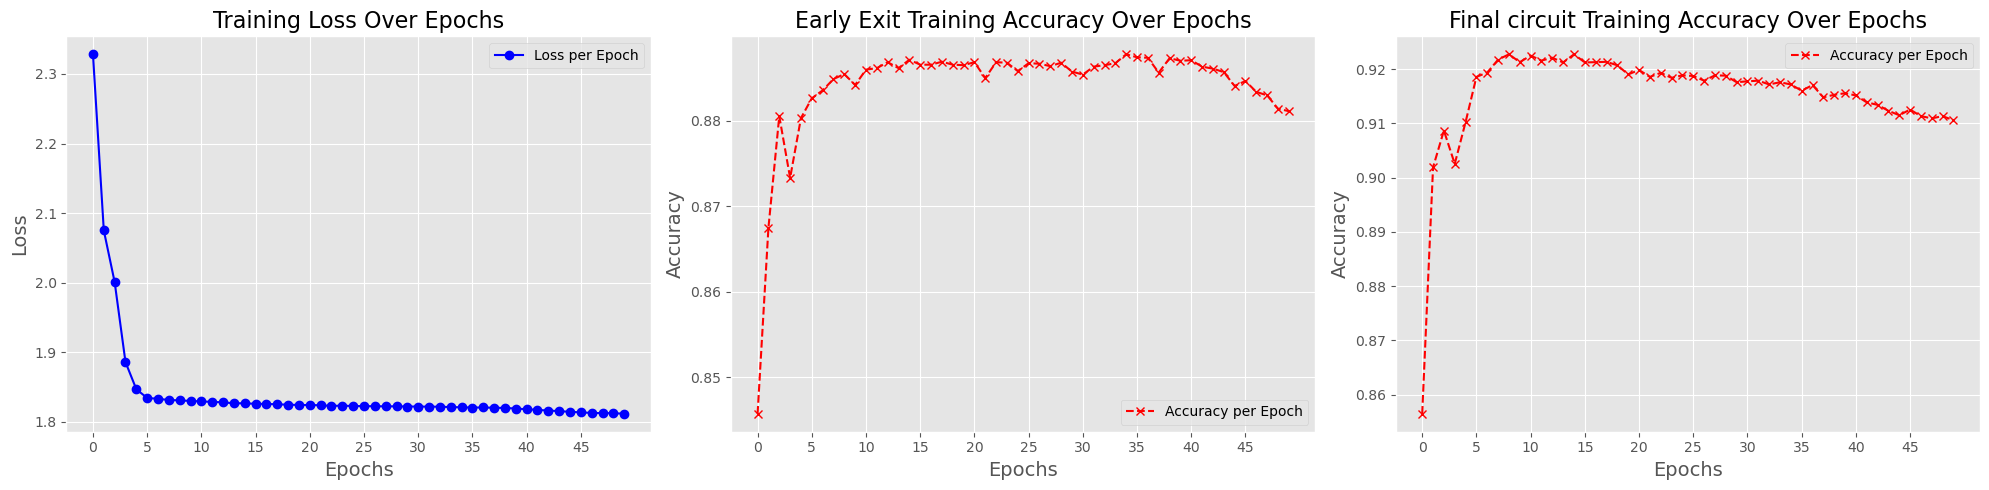

In [15]:
plt.style.use('ggplot')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# Plotting the loss on the first subplot
ax1.plot(list(range(50)), loss_history, marker='o', linestyle='-', color='b',
         label='Loss per Epoch')
ax1.set_title('Training Loss Over Epochs', fontsize=16)
ax1.set_xlabel('Epochs', fontsize=14)
ax1.set_ylabel('Loss', fontsize=14)
ax1.set_xticks(list(range(0, 50, 5)))
ax1.legend()
ax1.grid(True)

# Plotting the accuracy on the second subplot
ax2.plot(list(range(50)), mcm_accuracy, marker='x', linestyle='--', color='r',
         label='Accuracy per Epoch')
ax2.set_title('Early Exit Training Accuracy Over Epochs', fontsize=16)
ax2.set_xlabel('Epochs', fontsize=14)
ax2.set_ylabel('Accuracy', fontsize=14)
ax2.set_xticks(list(range(0, 50, 5)))
ax2.legend()
ax2.grid(True)

ax3.plot(list(range(50)), fm_accuracy, marker='x', linestyle='--', color='r',
         label='Accuracy per Epoch')
ax3.set_title('Final circuit Training Accuracy Over Epochs', fontsize=16)
ax3.set_xlabel('Epochs', fontsize=14)
ax3.set_ylabel('Accuracy', fontsize=14)
ax3.set_xticks(list(range(0, 50, 5)))
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.savefig('training_conferenza.png', dpi=300)
plt.show()

In [16]:
mcm_accuracy_2, fm_accuracy_2, loss_history_2 = model.fit(dataloader=train_dataloader, sched_epochs=5, learning_rate=[1e-3, 1e-3], epochs=10)

Epoch 1/10: 100%|██████████| 270/270 [01:46<00:00,  2.53it/s, fm_accuracy=0.938, loss=1.85, mcm_accuracy=0.859]


Time per epoch (s):  106.7461302280426
Epoch:  1 Loss:  1.8116135213110183
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8816550925925926
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9126157407407407
--------------------------------------------------------------------------


Epoch 2/10: 100%|██████████| 270/270 [01:49<00:00,  2.46it/s, fm_accuracy=0.922, loss=1.77, mcm_accuracy=0.891]


Time per epoch (s):  109.62517213821411
Epoch:  2 Loss:  1.8110294545138323
--------------------------------------------------------------------------
Mid circuit accuracy:  0.882175925925926
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9113425925925925
--------------------------------------------------------------------------


Epoch 3/10: 100%|██████████| 270/270 [01:49<00:00,  2.47it/s, fm_accuracy=0.906, loss=1.89, mcm_accuracy=0.859]


Time per epoch (s):  109.17669296264648
Epoch:  3 Loss:  1.8114120478983278
--------------------------------------------------------------------------
Mid circuit accuracy:  0.883275462962963
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9116319444444444
--------------------------------------------------------------------------


Epoch 4/10: 100%|██████████| 270/270 [01:48<00:00,  2.49it/s, fm_accuracy=0.859, loss=1.86, mcm_accuracy=0.859]


Time per epoch (s):  108.29089307785034
Epoch:  4 Loss:  1.8106588001604433
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8815393518518518
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9108217592592592
--------------------------------------------------------------------------


Epoch 5/10: 100%|██████████| 270/270 [01:51<00:00,  2.42it/s, fm_accuracy=0.938, loss=1.79, mcm_accuracy=0.922]


Time per epoch (s):  111.4484760761261
Epoch:  5 Loss:  1.8108051300048829
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8827546296296296
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9103009259259259
--------------------------------------------------------------------------


Epoch 6/10: 100%|██████████| 270/270 [01:48<00:00,  2.48it/s, fm_accuracy=0.969, loss=1.79, mcm_accuracy=0.875]


Time per epoch (s):  108.68236088752747
Epoch:  6 Loss:  1.8107045853579486
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8816550925925926
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9118055555555555
--------------------------------------------------------------------------


Epoch 7/10: 100%|██████████| 270/270 [01:49<00:00,  2.46it/s, fm_accuracy=0.859, loss=1.84, mcm_accuracy=0.844]


Time per epoch (s):  109.53670501708984
Epoch:  7 Loss:  1.8108470095528497
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8821180555555556
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9118055555555555
--------------------------------------------------------------------------


Epoch 8/10: 100%|██████████| 270/270 [01:49<00:00,  2.47it/s, fm_accuracy=0.875, loss=1.84, mcm_accuracy=0.891]


Time per epoch (s):  109.2606852054596
Epoch:  8 Loss:  1.8108679312246818
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8820023148148148
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9117476851851852
--------------------------------------------------------------------------


Epoch 9/10: 100%|██████████| 270/270 [01:49<00:00,  2.46it/s, fm_accuracy=0.938, loss=1.81, mcm_accuracy=0.922]


Time per epoch (s):  109.78443121910095
Epoch:  9 Loss:  1.8103709216471071
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8831597222222223
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9109953703703704
--------------------------------------------------------------------------


Epoch 10/10: 100%|██████████| 270/270 [01:50<00:00,  2.45it/s, fm_accuracy=0.859, loss=1.83, mcm_accuracy=0.875]

Time per epoch (s):  110.05442595481873
Epoch:  10 Loss:  1.810545180020509
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8815393518518518
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9116898148148148
--------------------------------------------------------------------------


In [17]:
mcm_accuracy_3, fm_accuracy_3, loss_history_3 = model.fit(dataloader=train_dataloader, sched_epochs=5, learning_rate=[1e-3, 1e-3], epochs=10)

Epoch 1/10: 100%|██████████| 270/270 [01:46<00:00,  2.53it/s, fm_accuracy=0.953, loss=1.81, mcm_accuracy=0.844]


Time per epoch (s):  106.90455603599548
Epoch:  1 Loss:  1.8106059383462976
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8829861111111111
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9117476851851852
--------------------------------------------------------------------------


Epoch 2/10: 100%|██████████| 270/270 [01:50<00:00,  2.45it/s, fm_accuracy=0.953, loss=1.72, mcm_accuracy=0.953]


Time per epoch (s):  110.08823823928833
Epoch:  2 Loss:  1.810388206994092
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8828703703703704
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9116319444444444
--------------------------------------------------------------------------


Epoch 3/10: 100%|██████████| 270/270 [01:50<00:00,  2.45it/s, fm_accuracy=0.938, loss=1.77, mcm_accuracy=0.922]


Time per epoch (s):  110.21756100654602
Epoch:  3 Loss:  1.8104304649211742
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8839699074074074
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9127314814814815
--------------------------------------------------------------------------


Epoch 4/10: 100%|██████████| 270/270 [01:49<00:00,  2.46it/s, fm_accuracy=0.953, loss=1.77, mcm_accuracy=0.922]


Time per epoch (s):  109.93967890739441
Epoch:  4 Loss:  1.8104620103482847
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8825810185185186
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9109953703703704
--------------------------------------------------------------------------


Epoch 5/10: 100%|██████████| 270/270 [01:52<00:00,  2.41it/s, fm_accuracy=0.906, loss=1.85, mcm_accuracy=0.906]


Time per epoch (s):  112.20210695266724
Epoch:  5 Loss:  1.8100176824463738
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8839699074074074
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9121527777777778
--------------------------------------------------------------------------


Epoch 6/10: 100%|██████████| 270/270 [01:47<00:00,  2.50it/s, fm_accuracy=0.969, loss=1.76, mcm_accuracy=0.906]


Time per epoch (s):  107.9951241016388
Epoch:  6 Loss:  1.8101473658173173
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8829282407407407
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9120370370370371
--------------------------------------------------------------------------


Epoch 7/10: 100%|██████████| 270/270 [01:43<00:00,  2.61it/s, fm_accuracy=0.922, loss=1.82, mcm_accuracy=0.875]


Time per epoch (s):  103.54968976974487
Epoch:  7 Loss:  1.8099316204035725
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8819444444444444
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9124421296296297
--------------------------------------------------------------------------


Epoch 8/10: 100%|██████████| 270/270 [01:46<00:00,  2.54it/s, fm_accuracy=0.922, loss=1.81, mcm_accuracy=0.859]


Time per epoch (s):  106.34687900543213
Epoch:  8 Loss:  1.8096929329412954
--------------------------------------------------------------------------
Mid circuit accuracy:  0.882349537037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9120949074074074
--------------------------------------------------------------------------


Epoch 9/10: 100%|██████████| 270/270 [01:49<00:00,  2.46it/s, fm_accuracy=0.922, loss=1.82, mcm_accuracy=0.844]


Time per epoch (s):  109.54414200782776
Epoch:  9 Loss:  1.8099890298313566
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8833912037037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9118055555555555
--------------------------------------------------------------------------


Epoch 10/10: 100%|██████████| 270/270 [01:46<00:00,  2.53it/s, fm_accuracy=0.938, loss=1.76, mcm_accuracy=0.906]

Time per epoch (s):  106.62006115913391
Epoch:  10 Loss:  1.8101620144314237
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8829861111111111
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9131365740740741
--------------------------------------------------------------------------


In [18]:
mcm_accuracy_4, fm_accuracy_4, loss_history_4 = model.fit(dataloader=train_dataloader, sched_epochs=5, learning_rate=[1e-3, 1e-3], epochs=20)

Epoch 1/20: 100%|██████████| 270/270 [01:48<00:00,  2.48it/s, fm_accuracy=0.875, loss=1.86, mcm_accuracy=0.828]


Time per epoch (s):  108.96895217895508
Epoch:  1 Loss:  1.8100676364368862
--------------------------------------------------------------------------
Mid circuit accuracy:  0.883449074074074
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9126736111111111
--------------------------------------------------------------------------


Epoch 2/20: 100%|██████████| 270/270 [01:50<00:00,  2.44it/s, fm_accuracy=0.938, loss=1.79, mcm_accuracy=0.859]


Time per epoch (s):  110.84508204460144
Epoch:  2 Loss:  1.8094663187309548
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8842013888888889
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9125
--------------------------------------------------------------------------


Epoch 3/20: 100%|██████████| 270/270 [01:50<00:00,  2.44it/s, fm_accuracy=0.969, loss=1.75, mcm_accuracy=0.906]


Time per epoch (s):  110.8437922000885
Epoch:  3 Loss:  1.8092961293679697
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8839699074074074
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9117476851851852
--------------------------------------------------------------------------


Epoch 4/20: 100%|██████████| 270/270 [01:49<00:00,  2.46it/s, fm_accuracy=0.922, loss=1.88, mcm_accuracy=0.844]


Time per epoch (s):  109.66568112373352
Epoch:  4 Loss:  1.8094923098882039
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8813078703703704
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9116319444444444
--------------------------------------------------------------------------


Epoch 5/20: 100%|██████████| 270/270 [01:50<00:00,  2.44it/s, fm_accuracy=0.969, loss=1.79, mcm_accuracy=0.891]


Time per epoch (s):  110.86545300483704
Epoch:  5 Loss:  1.8095105904119986
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8839699074074074
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9126736111111111
--------------------------------------------------------------------------


Epoch 6/20: 100%|██████████| 270/270 [01:48<00:00,  2.49it/s, fm_accuracy=0.844, loss=1.9, mcm_accuracy=0.812] 


Time per epoch (s):  108.31145405769348
Epoch:  6 Loss:  1.8094239755913064
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8828125
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9115162037037037
--------------------------------------------------------------------------


Epoch 7/20: 100%|██████████| 270/270 [01:53<00:00,  2.38it/s, fm_accuracy=0.953, loss=1.81, mcm_accuracy=0.922]


Time per epoch (s):  113.57402014732361
Epoch:  7 Loss:  1.809551801946428
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8830439814814814
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9107638888888889
--------------------------------------------------------------------------


Epoch 8/20: 100%|██████████| 270/270 [01:50<00:00,  2.45it/s, fm_accuracy=0.906, loss=1.8, mcm_accuracy=0.859] 


Time per epoch (s):  110.29964184761047
Epoch:  8 Loss:  1.8092271897527907
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8833912037037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9126736111111111
--------------------------------------------------------------------------


Epoch 9/20: 100%|██████████| 270/270 [01:48<00:00,  2.49it/s, fm_accuracy=0.922, loss=1.81, mcm_accuracy=0.922]


Time per epoch (s):  108.46339201927185
Epoch:  9 Loss:  1.8092485785484314
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8818865740740741
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9120949074074074
--------------------------------------------------------------------------


Epoch 10/20: 100%|██████████| 270/270 [01:47<00:00,  2.51it/s, fm_accuracy=0.938, loss=1.74, mcm_accuracy=0.938]


Time per epoch (s):  107.7714409828186
Epoch:  10 Loss:  1.8092246470627962
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8833333333333333
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9125
--------------------------------------------------------------------------


Epoch 11/20: 100%|██████████| 270/270 [01:48<00:00,  2.49it/s, fm_accuracy=0.875, loss=1.82, mcm_accuracy=0.844]


Time per epoch (s):  108.64397382736206
Epoch:  11 Loss:  1.8090152912669712
--------------------------------------------------------------------------
Mid circuit accuracy:  0.883275462962963
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9120370370370371
--------------------------------------------------------------------------


Epoch 12/20: 100%|██████████| 270/270 [01:53<00:00,  2.39it/s, fm_accuracy=0.938, loss=1.77, mcm_accuracy=0.906]


Time per epoch (s):  113.19992303848267
Epoch:  12 Loss:  1.809170612582454
--------------------------------------------------------------------------
Mid circuit accuracy:  0.883449074074074
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9115740740740741
--------------------------------------------------------------------------


Epoch 13/20: 100%|██████████| 270/270 [01:53<00:00,  2.38it/s, fm_accuracy=0.875, loss=1.76, mcm_accuracy=0.812]


Time per epoch (s):  113.32976293563843
Epoch:  13 Loss:  1.808958942801864
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8825810185185186
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9123263888888888
--------------------------------------------------------------------------


Epoch 14/20: 100%|██████████| 270/270 [01:48<00:00,  2.48it/s, fm_accuracy=0.891, loss=1.83, mcm_accuracy=0.906]


Time per epoch (s):  108.86974596977234
Epoch:  14 Loss:  1.8085007005267673
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8839699074074074
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9111689814814815
--------------------------------------------------------------------------


Epoch 15/20: 100%|██████████| 270/270 [01:48<00:00,  2.48it/s, fm_accuracy=0.938, loss=1.78, mcm_accuracy=0.859]


Time per epoch (s):  108.99535012245178
Epoch:  15 Loss:  1.8086250874731276
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8837384259259259
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9115162037037037
--------------------------------------------------------------------------


Epoch 16/20: 100%|██████████| 270/270 [01:49<00:00,  2.47it/s, fm_accuracy=0.953, loss=1.81, mcm_accuracy=0.938]


Time per epoch (s):  109.20166492462158
Epoch:  16 Loss:  1.8085522929827371
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8841435185185185
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9122685185185185
--------------------------------------------------------------------------


Epoch 17/20: 100%|██████████| 270/270 [01:49<00:00,  2.47it/s, fm_accuracy=0.906, loss=1.82, mcm_accuracy=0.859]


Time per epoch (s):  109.13212990760803
Epoch:  17 Loss:  1.8086882357244138
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8822916666666667
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9104166666666667
--------------------------------------------------------------------------


Epoch 18/20: 100%|██████████| 270/270 [01:48<00:00,  2.48it/s, fm_accuracy=0.906, loss=1.83, mcm_accuracy=0.891]


Time per epoch (s):  108.85687208175659
Epoch:  18 Loss:  1.8087479291138826
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8832175925925926
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9111689814814815
--------------------------------------------------------------------------


Epoch 19/20: 100%|██████████| 270/270 [01:48<00:00,  2.48it/s, fm_accuracy=0.938, loss=1.65, mcm_accuracy=0.906]


Time per epoch (s):  108.96765208244324
Epoch:  19 Loss:  1.808388888394391
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8825231481481481
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9119791666666667
--------------------------------------------------------------------------


Epoch 20/20: 100%|██████████| 270/270 [01:55<00:00,  2.34it/s, fm_accuracy=0.906, loss=1.82, mcm_accuracy=0.891]

Time per epoch (s):  115.42708683013916
Epoch:  20 Loss:  1.8084275559142784
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8829282407407407
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9115162037037037
--------------------------------------------------------------------------


In [19]:
pesi = model.params
with open("/Users/jackvittori/Desktop/conferenza/pesi.pickle", "wb") as file:
    pickle.dump(pesi, file)

In [22]:
mcm_accuracy = mcm_accuracy.extend(mcm_accuracy_2)
mcm_accuracy = mcm_accuracy.extend(mcm_accuracy_3)
mcm_accuracy = mcm_accuracy.extend(mcm_accuracy_4)

fm_accuracy = fm_accuracy.extend(fm_accuracy_2)
fm_accuracy = fm_accuracy.extend(fm_accuracy_3)
fm_accuracy = fm_accuracy.extend(fm_accuracy_4)

loss_history = loss_history.extend(loss_history_2)
loss_history = loss_history.extend(loss_history_3)
loss_history = loss_history.extend(loss_history_4)

AttributeError: 'NoneType' object has no attribute 'extend'

In [26]:
print(mcm_accuracy)

None
